In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('laptop_details.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [4]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


<AxesSubplot:>

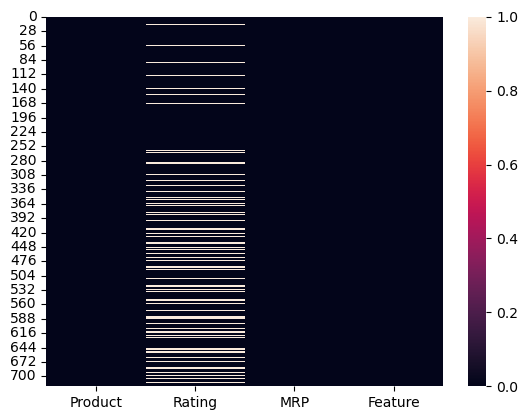

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.isnull().value_counts()

Product  Rating  MRP    Feature
False    False   False  False      581
         True    False  False      139
dtype: int64

<AxesSubplot:ylabel='Frequency'>

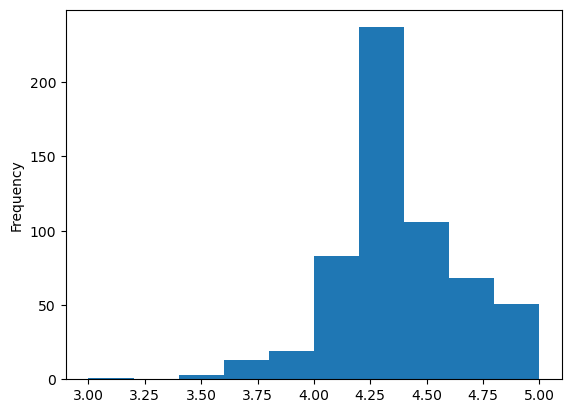

In [7]:
df['Rating'].plot(kind='hist')

In [8]:
df['Rating'].mean()

4.321170395869185

In [9]:
df['Rating'].median()

4.3

<AxesSubplot:xlabel='Rating', ylabel='MRP'>

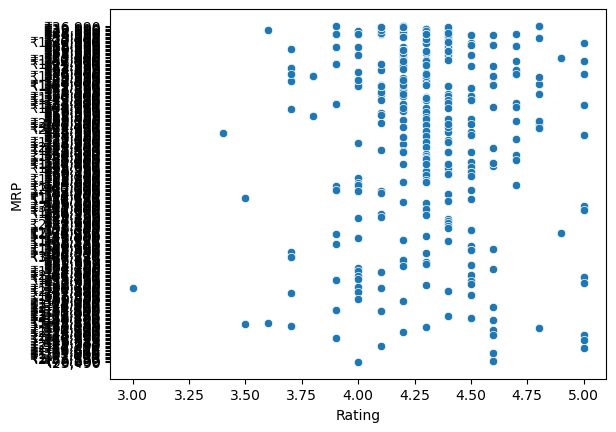

In [10]:
sns.scatterplot(x="Rating",y="MRP",data=df)

## Rating does not have any impact on the Price of the product

# MRP Feature

In [11]:
df.dtypes

Product     object
Rating     float64
MRP         object
Feature     object
dtype: object

In [12]:
df['MRP'] = df['MRP'].apply(lambda my_str: int(my_str.replace("₹","").replace(",", "")))

<AxesSubplot:xlabel='Rating', ylabel='MRP'>

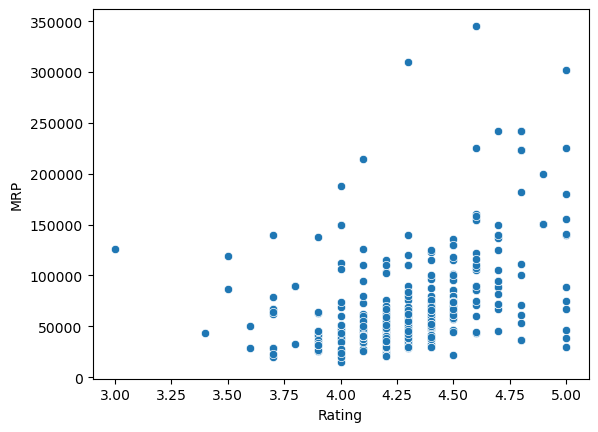

In [13]:
sns.scatterplot(x="Rating",y="MRP",data=df)

In [14]:
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


<AxesSubplot:ylabel='Frequency'>

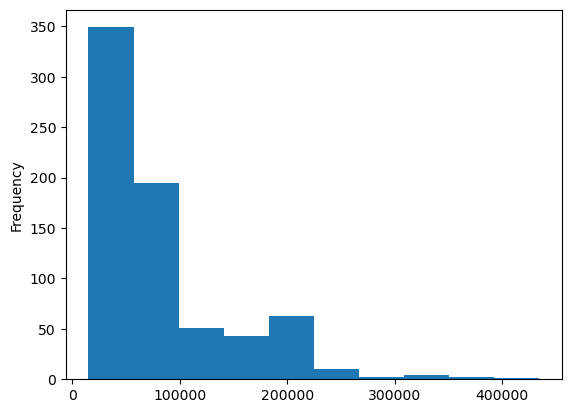

In [15]:
df['MRP'].plot(kind='hist')

In [16]:
df['MRP'].max()

434830

In [17]:
df['MRP'].min()

14990

In [18]:
df['MRP'].mean()

81605.8375

In [19]:
df['MRP'].median()

59990.0

<AxesSubplot:>

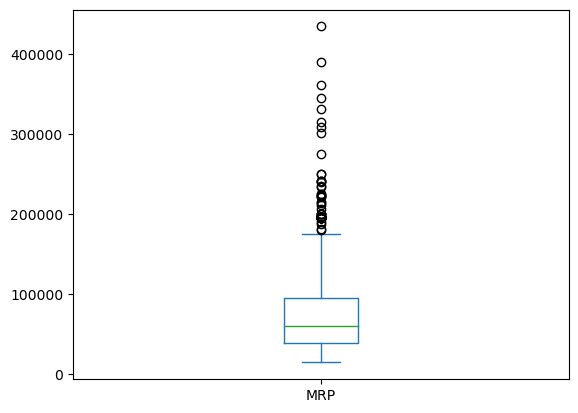

In [20]:
df['MRP'].plot(kind='box')

In [21]:
df[df['MRP']>200000].shape

(27, 4)

### We can remove this outliers

# Feature Column

In [22]:
import re

### Processor Column

In [23]:
df['Processor'] = df['Feature'].apply(lambda x: re.findall(r'\b(?:AMD|Intel|M1|M2|Qualcomm)[\s\w]+Processor', x))

In [24]:
df['Processor']

0                [Intel Core i3 Processor]
1                [Intel Core i3 Processor]
2                [Intel Core i3 Processor]
3        [AMD Ryzen 5 Hexa Core Processor]
4                [Intel Core i5 Processor]
                      ...                 
715    [Intel Celeron Dual Core Processor]
716      [AMD Ryzen 7 Octa Core Processor]
717      [AMD Ryzen 9 Octa Core Processor]
718              [Intel Core i7 Processor]
719              [Intel Core i5 Processor]
Name: Processor, Length: 720, dtype: object

### RAM Column

In [25]:
df['RAM'] = df['Feature'].apply(lambda x: re.findall(r'\d+\sGB[\s\w]+RAM', x))

In [26]:
df['RAM'].isnull().sum()

0

In [27]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM]


In [28]:
df.tail()

,Product,Rating,MRP,Feature,Processor,RAM
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,[Intel Celeron Dual Core Processor],[4 GB LPDDR4 RAM]
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 7 Octa Core Processor],[8 GB DDR4 RAM]
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,[AMD Ryzen 9 Octa Core Processor],[16 GB DDR5 RAM]
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,[Intel Core i7 Processor],[16 GB LPDDR5 RAM]
719,Lenovo Ideapad Slim 3i Core i5 10th Gen - (8 G...,4.2,50990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM]


### Operating System Column

In [29]:
df['OS'] = df['Feature'].apply(lambda x: re.findall(r'(?:Windows|Chrome|Mac|Dos)[\s\w]+Operating System', x, re.IGNORECASE))

In [30]:
df['OS'].head()

0    [Windows 11 Operating System]
1    [Windows 11 Operating System]
2    [Windows 11 Operating System]
3    [Windows 10 Operating System]
4    [Windows 11 Operating System]
Name: OS, dtype: object

In [31]:
df['OS'].tail()

715        [Chrome Operating System]
716    [Windows 11 Operating System]
717    [Windows 11 Operating System]
718    [Windows 11 Operating System]
719    [Windows 10 Operating System]
Name: OS, dtype: object

In [32]:
df['OS'].isnull().sum()

0

### Storage Column

In [33]:
df['Storage'] = df['Feature'].apply(lambda x : re.findall(r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)', x))

In [34]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[256 GB SSD]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[Windows 10 Operating System],[512 GB SSD]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD]


In [35]:
df['Storage'].isnull().sum()

0

### Brand of the laptop

In [36]:
df["Brand"] = df.Product.apply(lambda x: re.findall(r'^\w+', x))

In [37]:
df['Brand']

0      [Lenovo]
1      [Lenovo]
2        [ASUS]
3          [HP]
4        [ASUS]
         ...   
715      [ASUS]
716    [Lenovo]
717      [ASUS]
718      [ASUS]
719    [Lenovo]
Name: Brand, Length: 720, dtype: object

In [38]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[Windows 11 Operating System],[512 GB SSD],[ASUS]


### Refactor the data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int64  
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 50.8+ KB


In [40]:
df['Processor']

0                [Intel Core i3 Processor]
1                [Intel Core i3 Processor]
2                [Intel Core i3 Processor]
3        [AMD Ryzen 5 Hexa Core Processor]
4                [Intel Core i5 Processor]
                      ...                 
715    [Intel Celeron Dual Core Processor]
716      [AMD Ryzen 7 Octa Core Processor]
717      [AMD Ryzen 9 Octa Core Processor]
718              [Intel Core i7 Processor]
719              [Intel Core i5 Processor]
Name: Processor, Length: 720, dtype: object

In [41]:
df['Processor'] = df['Processor'].apply(lambda x: ''.join(x))

In [42]:
df['Processor']

0                Intel Core i3 Processor
1                Intel Core i3 Processor
2                Intel Core i3 Processor
3        AMD Ryzen 5 Hexa Core Processor
4                Intel Core i5 Processor
                     ...                
715    Intel Celeron Dual Core Processor
716      AMD Ryzen 7 Octa Core Processor
717      AMD Ryzen 9 Octa Core Processor
718              Intel Core i7 Processor
719              Intel Core i5 Processor
Name: Processor, Length: 720, dtype: object

In [43]:
df.columns

Index(['Product', 'Rating', 'MRP', 'Feature', 'Processor', 'RAM', 'OS',
       'Storage', 'Brand'],
      dtype='object')

In [44]:
df['RAM'] = df['RAM'].apply(lambda x: ''.join(x))
df['OS'] = df['OS'].apply(lambda x: ''.join(x))
df['Storage'] = df['Storage'].apply(lambda x: ''.join(x))
df['Brand'] = df['Brand'].apply(lambda x: ''.join(x))

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    int64  
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), int64(1), object(7)
memory usage: 50.8+ KB


# Machine Learning

In [46]:
df.Processor.value_counts()

Intel Core i5 Processor                   151
Intel Core i3 Processor                   129
AMD Ryzen 9 Octa Core Processor            87
AMD Ryzen 7 Octa Core Processor            79
Intel Core i7 Processor                    50
AMD Ryzen 5 Hexa Core Processor            48
AMD Ryzen 3 Dual Core Processor            42
AMD Ryzen 5 Quad Core Processor            37
                                           25
Intel Celeron Dual Core Processor          20
Intel Core i9 Processor                    10
M1 Processor                                7
M1 Pro Processor                            6
M2 Processor                                5
AMD Ryzen 3 Quad Core Processor             4
Intel Pentium Quad Core Processor           3
Intel Celeron Quad Core Processor           3
Intel Pentium Silver Processor              2
Intel Evo Core i5 Processor                 2
AMD Athlon Dual Core Processor              2
Intel OptaneIntel Core i3 Processor         2
Qualcomm Snapdragon 7c Gen 2 Proce

In [47]:
new_df = df[(df['Processor'] != 'Qualcomm Snapdragon 7c Gen 2 Processor') & (df['Processor'] != 'AMD Ryzen 7 Quad Core Processor') & (df['Processor'] != 'AMD Ryzen 5 Dual Core Processor') & (df['Processor'] != 'AMD Dual Core Processor') & (df['Processor'] != 'AMD Ryzen 3 Hexa Core Processor')]

In [48]:
new_df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [49]:
new_df.RAM.value_counts()

8 GB DDR4 RAM                                                                                             375
16 GB DDR4 RAM                                                                                            152
16 GB DDR5 RAM                                                                                             77
4 GB DDR4 RAM                                                                                              25
16 GB LPDDR4X RAM                                                                                          16
8 GB LPDDR4X RAM                                                                                           16
32 GB DDR5 RAM                                                                                             11
16 GB LPDDR5 RAM                                                                                            9
4 GB LPDDR4 RAM                                                                                             7
16 GB Unif

In [50]:
new_df = new_df[(new_df.RAM != '16 GB LPDDR4 RAM') & (new_df.RAM != '32 GB LPDDR4X RAM') & (new_df.RAM != '16 GB LPDDR3 RAM') & (new_df.RAM != '128 GB SSD for Reduced Boot Up Time and in Game LoadingUpgradable SSD Upto 512 GB and RAM8 GB DDR4 RAM') & (new_df.RAM != '32 GB Unified Memory RAM')]

In [51]:
new_df = new_df[(new_df.Brand != 'SAMSUNG') & (new_df.Brand != 'Vaio')]

In [52]:
new_df = new_df[(new_df['OS'] != 'Windows 11 when availableAMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64 bit Windows 10 Operating System')]

In [53]:
new_df

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,ASUS
...,...,...,...,...,...,...,...,...,...
715,ASUS Chromebook Flip Touch Celeron Dual Core -...,4.0,23490,Intel Celeron Dual Core Processor4 GB LPDDR4 R...,Intel Celeron Dual Core Processor,4 GB LPDDR4 RAM,Chrome Operating System,,ASUS
716,Lenovo IdeaPad Gaming 3 Ryzen 7 Octa Core AMD ...,4.5,73490,AMD Ryzen 7 Octa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,Lenovo
717,ASUS ROG Zephyrus G15 Ryzen 9 Octa Core 6900HS...,NaN,194990,AMD Ryzen 9 Octa Core Processor16 GB DDR5 RAM6...,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD,ASUS
718,ASUS Zenbook Flip 14 OLED (2022) Touch Panel C...,3.0,125990,Intel Core i7 Processor (12th Gen)16 GB LPDDR5...,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD,ASUS


In [54]:
new_df = new_df[new_df['Processor'] != '']

In [55]:
new_df['Processor'].unique()

array(['Intel Core i3 Processor', 'AMD Ryzen 5 Hexa Core Processor',
       'Intel Core i5 Processor', 'Intel OptaneIntel Core i3 Processor',
       'AMD Ryzen 5 Quad Core Processor',
       'AMD Ryzen 9 Octa Core Processor',
       'AMD Ryzen 7 Octa Core Processor', 'M1 Processor',
       'Intel Celeron Dual Core Processor',
       'AMD Ryzen 3 Dual Core Processor',
       'AMD Athlon Dual Core Processor', 'Intel Evo Core i5 Processor',
       'AMD Ryzen 3 Quad Core Processor', 'M2 Processor',
       'Intel Celeron Quad Core Processor', 'Intel Core i7 Processor',
       'M1 Pro Processor', 'Intel Core i9 Processor',
       'Intel Pentium Silver Processor',
       'Intel Pentium Quad Core Processor'], dtype=object)

In [56]:
new_df = new_df[new_df['Storage'] != '']

In [57]:
new_df['Storage'].unique()

array(['256 GB SSD', '512 GB SSD', '1 TB HDD256 GB SSD', '1 TB SSD',
       '256 GB HDD256 GB SSD', '128 GB SSD', '1 TB HDD',
       '1 TB HDD512 GB SSD', '2 TB SSD'], dtype=object)

In [58]:
df = new_df

In [59]:
df1 = df[["Brand", "Processor", "RAM", "OS", "Storage"]]

In [60]:
df1

,Brand,Processor,RAM,OS,Storage
0,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,256 GB SSD
1,Lenovo,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
2,ASUS,Intel Core i3 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
3,HP,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD
4,ASUS,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
...,...,...,...,...,...
714,HP,AMD Ryzen 7 Octa Core Processor,16 GB DDR4 RAM,Windows 10 Operating System,512 GB SSD
716,Lenovo,AMD Ryzen 7 Octa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD
717,ASUS,AMD Ryzen 9 Octa Core Processor,16 GB DDR5 RAM,Windows 11 Operating System,1 TB SSD
718,ASUS,Intel Core i7 Processor,16 GB LPDDR5 RAM,Windows 11 Operating System,512 GB SSD


### Feature Transformation

In [61]:
y = np.log(df['MRP'])
y

0      10.518403
1      10.596385
2      10.403960
3      10.819578
4      10.819578
         ...    
714    11.407565
716    11.204905
717    12.180704
718    11.743958
719    10.839385
Name: MRP, Length: 675, dtype: float64

<AxesSubplot:ylabel='Density'>

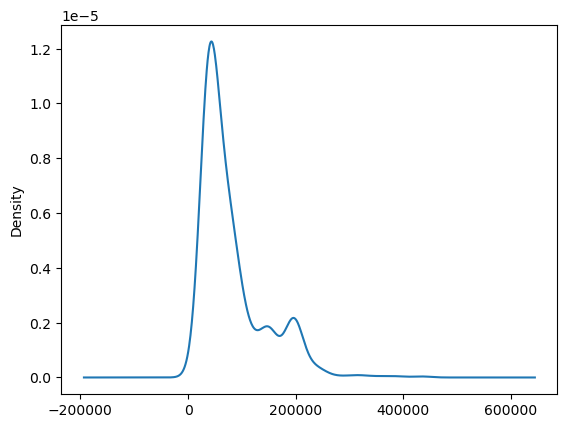

In [62]:
df['MRP'].plot(kind='kde')

<AxesSubplot:ylabel='Density'>

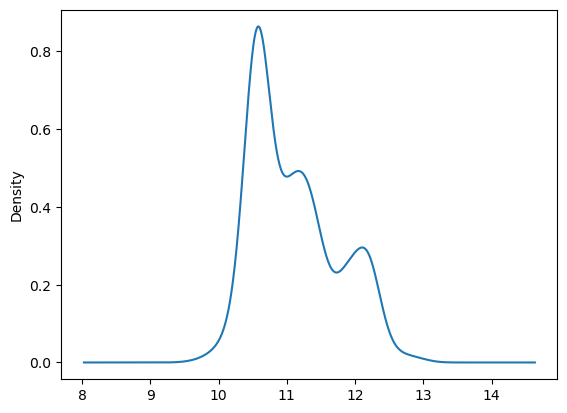

In [63]:
y.plot(kind='kde')

In [64]:
import scipy.stats as stats

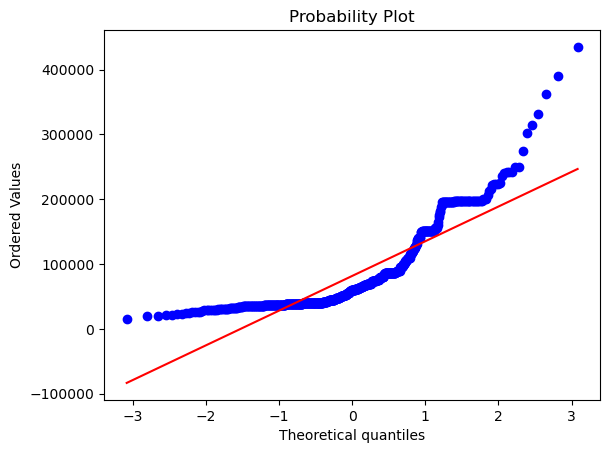

In [65]:
stats.probplot(df['MRP'], dist='norm', plot=plt)
plt.show()

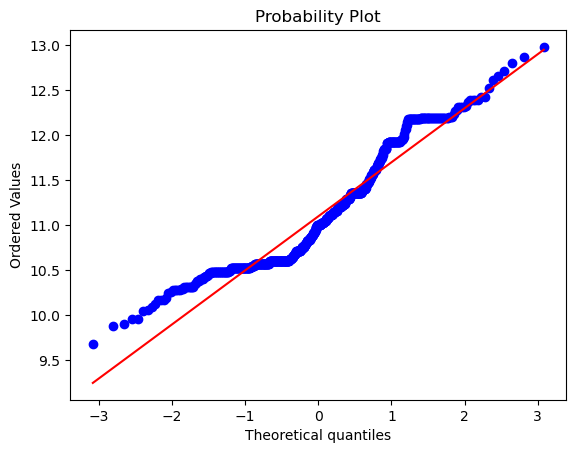

In [66]:
stats.probplot(y, dist='norm', plot=plt)
plt.show()

## Create ML model

In [67]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

In [68]:
ct = ColumnTransformer(transformers=[
    ('encoder',OneHotEncoder(sparse=False,drop='first'),["Brand", "Processor", "RAM", "OS", "Storage"])
],remainder='passthrough')

X = ct.fit_transform(df1)
y = df['MRP']

In [69]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=47)

In [70]:
# train a random forest regression model on the training set
rf = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)
model = rf.fit(X_train2, y_train2)
model

RandomForestRegressor(max_depth=15, max_features=0.75, max_samples=0.5,
                      random_state=3)

In [71]:
# make predictions on the testing set
y_pred = model.predict(X_test2)

In [72]:
df.shape

(675, 9)

In [74]:
# check the prediction
Brand = 'Lenovo'
Processor = 'Intel Core i5 Processor'
RAM = '8 GB DDR4 RAM'
OS = 'Windows 10 Operating System'
Storage = '128 GB SSD'

In [75]:
new_data = pd.DataFrame([[Brand, Processor, RAM, OS, Storage]], columns=["Brand", "Processor", "RAM", "OS", "Storage"])
new_data

,Brand,Processor,RAM,OS,Storage
0,Lenovo,Intel Core i5 Processor,8 GB DDR4 RAM,Windows 10 Operating System,128 GB SSD


In [76]:
new_data_encoded = ct.transform(new_data)

In [77]:
prediction_encoded = rf.predict(new_data_encoded)
prediction_encoded[0].round(2)

57296.04

In [78]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_test2,y_pred))
print(mean_absolute_error(y_test2,y_pred))

0.9364252740316807
6566.632452434094


### Exporting the Model

In [ ]:
import pickle

In [ ]:
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
df